<a href="https://colab.research.google.com/github/Jai-satya/codsoft/blob/main/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install opencv-python face_recognition pillow matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=97624a98b1bd65d6088599c2229b12beb172ffd2e481fca6bb6b2d02ee97acaa
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [5]:

!pip install opencv-python face_recognition pillow


In [2]:
from google.colab import files
uploaded = files.upload()


Saving prabha.jpg to prabha (1).jpg


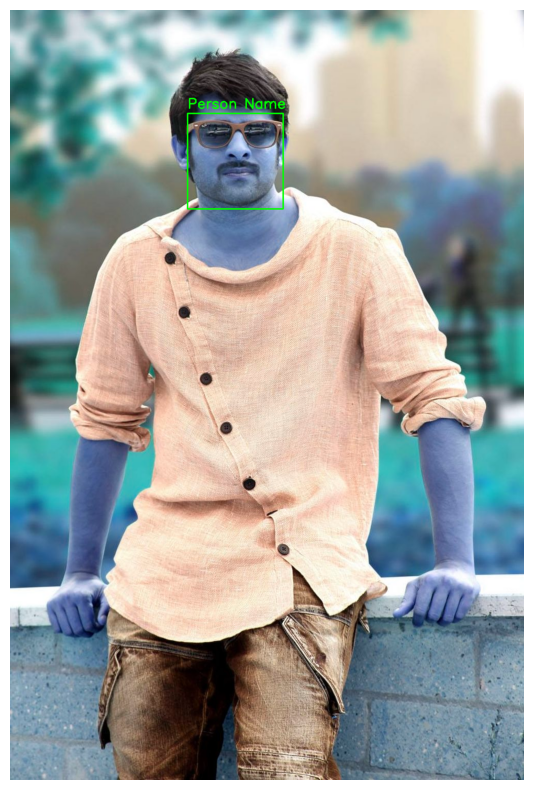

In [6]:
import cv2
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load known face image and encode it
known_image_path =  '/content/prabha (1).jpg'# Update this path as needed
known_image = face_recognition.load_image_file(known_image_path)
known_face_encoding = face_recognition.face_encodings(known_image)[0]
known_face_encodings = [known_face_encoding]
known_face_names = ["Person Name"]

# Load uploaded image
uploaded_image_path = list(uploaded.keys())[0]  # Get the uploaded image file name
uploaded_image = face_recognition.load_image_file(uploaded_image_path)

# Convert the image to RGB (OpenCV uses BGR)
rgb_image = cv2.cvtColor(uploaded_image, cv2.COLOR_BGR2RGB)

# Find all face locations and face encodings in the current image
face_locations = face_recognition.face_locations(rgb_image)
face_encodings = face_recognition.face_encodings(rgb_image, face_locations)

# Draw rectangles around faces and add labels
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown"

    if True in matches:
        first_match_index = matches.index(True)
        name = known_face_names[first_match_index]

    # Draw rectangle around the face
    cv2.rectangle(rgb_image, (left, top), (right, bottom), (0, 255, 0), 2)
    # Draw label with name
    cv2.putText(rgb_image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image)
plt.axis('off')
plt.show()
